# Clothing reviews

### Ideas:

- Are there common themes in the positive/negative reviews?
- Can we find out which products/departments are doing relatively well or poorly?

### Approach:
- A random forest classifier is used on the vectorized review texts of the positive and negative reviews that had at least 5 "thumbs-up" (positive_feedback_count > 5). T-testing on the feature importances of the words helped to sort the resultant word lists into significant words.

### Data:
https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews?select=Womens+Clothing+E-Commerce+Reviews.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

In [2]:
df = pd.read_csv("data/Womens Clothing E-Commerce Reviews.csv").iloc[:,1:]
df.columns = [i.lower().replace(' ', '_') for i in df.columns]
df.head()

,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
df.groupby(['division_name', 'department_name', 'class_name']).count().age

division_name   department_name  class_name    
General         Bottoms          Casual bottoms       2
                                 Jeans              787
                                 Pants              835
                                 Shorts             317
                                 Skirts             601
                Dresses          Dresses           3730
                Jackets          Jackets            397
                                 Outerwear          248
                Tops             Blouses           1993
                                 Fine gauge         685
                                 Knits             3259
                                 Sweaters           900
                Trend            Trend               96
General Petite  Bottoms          Jeans              360
                                 Pants              553
                                 Skirts             344
                Dresses          Dresses           2589


In [4]:
top_index = (df.groupby('clothing_id').count().age.sort_values(ascending = False)/df.shape[0]).head(25).index
top_index

Int64Index([1078,  862, 1094, 1081,  872,  829, 1110,  868,  895,  936,  867,
             850, 1095,  863, 1077, 1059, 1086, 1080,  860, 1083,  861,  873,
             828, 1092, 1033],
           dtype='int64', name='clothing_id')

In [5]:
top_25_df = df[df.clothing_id.isin(top_index)]

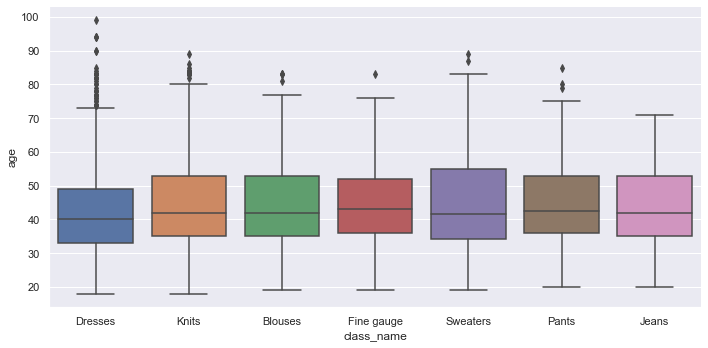

In [6]:
sns.catplot(data=top_25_df, x = 'class_name', y = 'age', kind = 'box',
           height = 5, aspect = 2)

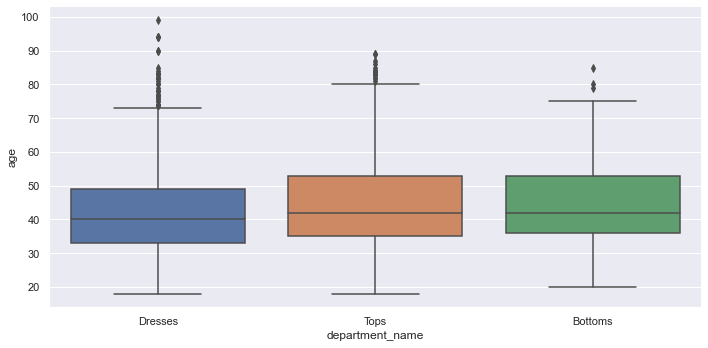

In [7]:
sns.catplot(data=top_25_df, x = 'department_name', y = 'age', kind = 'box',
           height = 5, aspect = 2)

In [8]:
df.groupby('rating').count().clothing_id/df.shape[0]

rating
1    0.035851
2    0.066635
3    0.122243
4    0.216171
5    0.559099
Name: clothing_id, dtype: float64

In [9]:
df.groupby('recommended_ind').count().clothing_id/df.shape[0]

recommended_ind
0    0.177638
1    0.822362
Name: clothing_id, dtype: float64

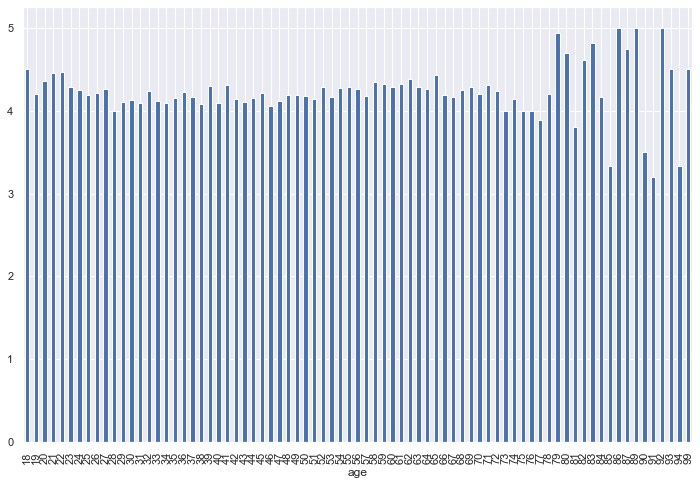

In [10]:
plt.figure(figsize = (12,8))
df.groupby('age').mean().rating.plot(kind = 'bar')

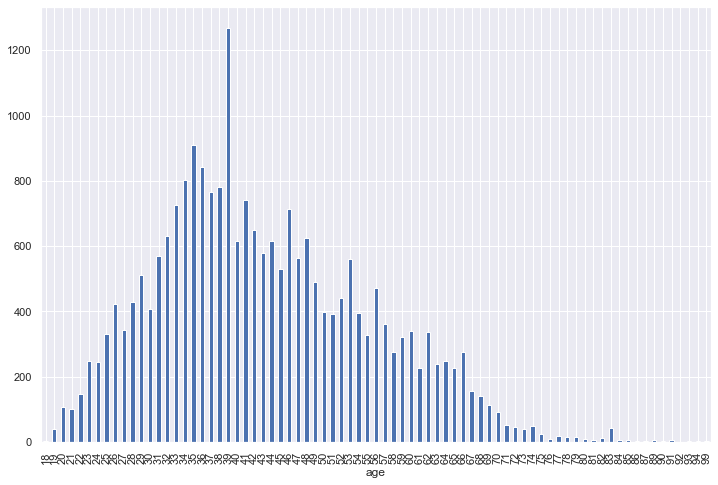

In [11]:
plt.figure(figsize = (12,8))
df.groupby('age').count().rating.plot(kind = 'bar')

- Most ratings are 4 or higher (77.5%)
- Most reviews are between 31 and 46 years old
- Ratings don't change according to age
- Ratings are not changing by categories

(0.0, 50.0)

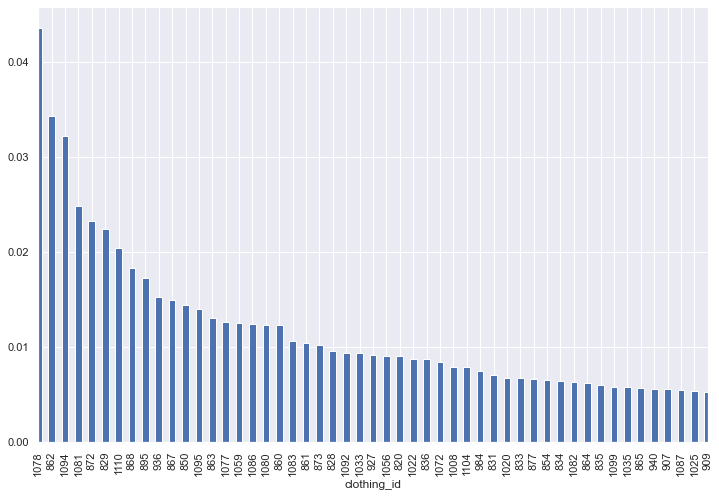

In [12]:
plt.figure(figsize = (12,8))

(df.groupby('clothing_id').count().age.sort_values(ascending = False)/df.shape[0]).plot(kind = 'bar')

plt.xlim([0,50])

In [13]:
df.clothing_id.nunique()

1206

In [14]:
(df.groupby('clothing_id').count().age.sort_values(ascending = False)/df.shape[0]).head(25).sum()

0.42957506599676404

- the top 25 products comprise 43% of all reviews

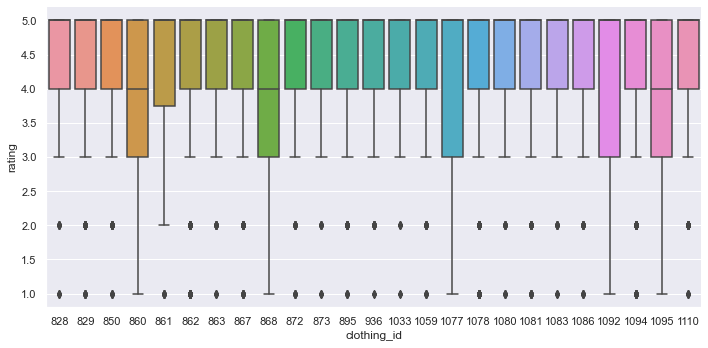

In [15]:
sns.catplot(data=top_25_df, x = 'clothing_id', y = 'rating', kind = 'box',
           height = 5, aspect = 2)

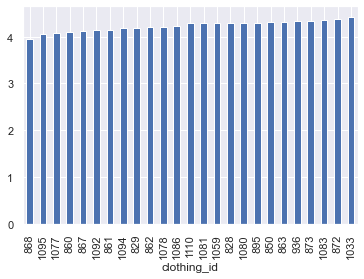

In [16]:
top_25_df.groupby('clothing_id').mean().rating.sort_values().plot(kind = 'bar')

In [17]:
print(df[(df.clothing_id == 860)].shape[0])

df[(df.clothing_id == 860) & (df.rating == 1)]

288


,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
1369,860,40,Unflattering,It's short and wide. not a good combo for anyo...,1,0,7,General,Tops,Knits
1474,860,45,NaN,Saw this on the sale rack and decided to try o...,1,0,2,General,Tops,Knits
1496,860,51,I wanted to like this...,I wanted to like this top so so so so badly. s...,1,0,0,General,Tops,Knits
6952,860,55,Too big,The shirt is very big. it would be cute as a m...,1,0,1,General,Tops,Knits
9507,860,62,Disappointed!,"The tank looks nothing like the one pictured, ...",1,0,4,General,Tops,Knits
9892,860,70,Not a wow,I bought the bronze color which was nice but t...,1,0,0,General Petite,Tops,Knits
14772,860,63,NaN,NaN,1,0,0,General Petite,Tops,Knits
20598,860,32,Ugly design,"So i bought this, even after seeing the other ...",1,0,2,General,Tops,Knits


In [18]:
print(df[(df.clothing_id == 828)].shape[0])

df[(df.clothing_id == 828) & (df.rating == 1)]

225


,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
3820,828,83,So wanted to love.....,I saw this top online and ordered immediately!...,1,0,16,General,Tops,Blouses
6070,828,46,Test like fit,This shirt was tent like on me and there was r...,1,0,0,General,Tops,Blouses
6108,828,52,Fabric looks cheap,I returned this item. it was soft. very blah f...,1,0,0,General,Tops,Blouses
6599,828,46,Oversized and unstructured but soft,I tried this shirt in a small (my usual retail...,1,0,4,General Petite,Tops,Blouses
16464,828,73,Cute top but very uncomfortable,The styling of this top is so cute but the fab...,1,0,0,General,Tops,Blouses
18749,828,42,Disappointing for the price,"The cut of this piece is great, the quality of...",1,0,8,General Petite,Tops,Blouses


In [19]:
popular_clothing_items = df.groupby('clothing_id').count().age.sort_values(ascending = False)[:50]
popular_clothing_items.index[:10]

Int64Index([1078, 862, 1094, 1081, 872, 829, 1110, 868, 895, 936], dtype='int64', name='clothing_id')

In [20]:
df.recommended_ind.groupby(df.rating).value_counts()

rating  recommended_ind
1       0                    826
        1                     16
2       0                   1471
        1                     94
3       0                   1682
        1                   1189
4       1                   4909
        0                    168
5       1                  13106
        0                     25
Name: recommended_ind, dtype: int64

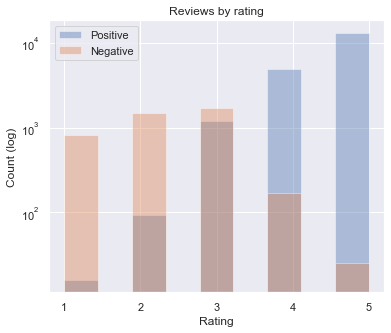

In [21]:
import numpy as np

plt.figure(figsize=(6, 5))

positive = df[df.recommended_ind == 1]
sns.distplot(positive.rating, kde=False, label="Positive", bins = 9)

negative = df[df.recommended_ind == 0]
sns.distplot(negative.rating, kde=False, label="Negative", bins = 9)

plt.legend()
plt.title('Reviews by rating')
plt.xlabel('Rating')
plt.ylabel('Count (log)')
plt.yscale('log')
plt.xticks(np.arange(1, 6))
_ = plt.show()

In [22]:
df[(df.rating == 1) & (df.recommended_ind == 1)]

,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
2427,939,39,NaN,Beautiful jacket and i got lots of compliments...,1,1,0,General,Tops,Sweaters
2872,829,51,NaN,Very cute top. i went down a size because for ...,1,1,1,General Petite,Tops,Blouses
5570,861,69,Great t,I love this t-shirt because it has the combina...,1,1,0,General,Tops,Knits
6216,829,53,Traditional material in a new way,Love the movement of the blouse and how it fal...,1,1,0,General,Tops,Blouses
7740,872,44,Odd neckline,I loved the color and design until i tried it ...,1,1,0,General,Tops,Knits
7850,956,43,NaN,"This is so close to perfect, but there's a sea...",1,1,1,General Petite,Jackets,Jackets
9877,1084,58,NaN,"I loved the dress, but just not dressy enough ...",1,1,5,General Petite,Dresses,Dresses
10517,1110,44,Beautiful dress; so excited to wear it!!!,I saw this dress in the catalog and had to hav...,1,1,0,General,Dresses,Dresses
13607,1075,48,Great dress,Such a great dress. fit is flattering. the sma...,1,1,0,General,Dresses,Dresses
16194,1081,68,NaN,This is an extremely flattering dress. i could...,1,1,1,General Petite,Dresses,Dresses


- it's strange that someone would leave a one-star review and still recommend a product, or leave a five-star review and not recommend a product. Maybe these people didn't fill out their review surveys carefully?

In [23]:
# for i in df.age.sort_values().unique():
#     print(i)
#     print(df[df.age == i].class_name.value_counts().index[0], df[df.age == i].class_name.value_counts()[0])
#     print(df[df.age == i].class_name.value_counts().index[1], df[df.age == i].class_name.value_counts()[1])
#     print(df[df.age == i].class_name.value_counts().index[2])

- The most reviewed item by age is shown below

In [24]:
df.groupby('age').clothing_id.agg(lambda x:x.value_counts().index[0]).head(60)

age
18    1072
19    1095
20    1078
21     862
22    1081
23    1078
24    1094
25    1078
26    1078
27    1094
28    1078
29    1078
30    1094
31    1078
32    1094
33    1078
34    1078
35    1078
36    1078
37     862
38    1078
39    1078
40     862
41     862
42    1078
43    1078
44    1078
45    1078
46    1078
47    1094
48    1078
49    1078
50     862
51    1078
52    1078
53    1078
54    1094
55     868
56    1078
57    1078
58     829
59     862
60     862
61    1078
62    1078
63     862
64     862
65     863
66     829
67     868
68    1081
69     936
70     867
71     863
72    1081
73     860
74     862
75     868
76     862
77     862
Name: clothing_id, dtype: int64

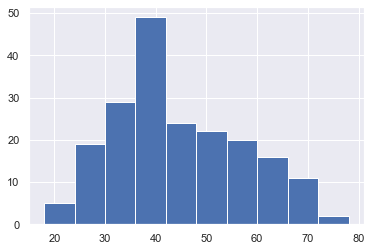

In [25]:
df[df.clothing_id ==1072].age.hist()

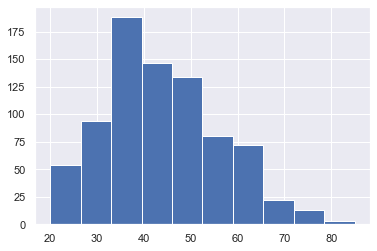

In [26]:
df[df.clothing_id ==862].age.hist()

In [27]:
df[df.clothing_id == 860].head()

,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
893,860,30,NaN,NaN,5,1,0,General Petite,Tops,Knits
1122,860,41,Wanted to love it!,Was so excited for this top! loved the embroid...,3,0,5,General Petite,Tops,Knits
1126,860,53,Favorite summer top,I love this little number. the quality is terr...,5,1,1,General Petite,Tops,Knits
1129,860,48,Beautiful in blue!,I totally love this tank! the yoke detailing i...,5,1,2,General Petite,Tops,Knits
1130,860,39,Gorgeous!,Gorgeous cobalt blue color!!! usually s/m- bo...,5,1,0,General Petite,Tops,Knits


In [28]:
df[df.clothing_id == 1095].head()

,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
11,1095,39,NaN,This dress is perfection! so pretty and flatte...,5,1,2,General Petite,Dresses,Dresses
12,1095,53,Perfect!!!,More and more i find myself reliant on the rev...,5,1,2,General Petite,Dresses,Dresses
58,1095,36,NaN,"I got this in the petite length, size o, and i...",4,1,0,General Petite,Dresses,Dresses
60,1095,41,Gorgeous dress!,This dress is simply beautiful and stunning. i...,5,1,0,General Petite,Dresses,Dresses
1215,1095,50,A little itchy for me,I tried this on in the store - i tried regular...,3,1,1,General,Dresses,Dresses


In [29]:
df.isnull().sum()

clothing_id                   0
age                           0
title                      3810
review_text                 845
rating                        0
recommended_ind               0
positive_feedback_count       0
division_name                14
department_name              14
class_name                   14
dtype: int64

- Null values for review_text are addressed later by separating into popular reviews, which all have review_text

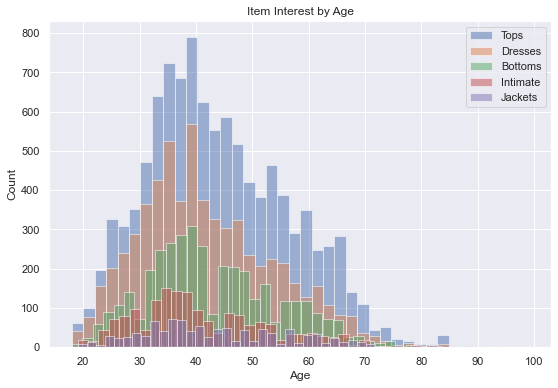

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()


a = df[df.department_name == "Tops"].age
b = df[df.department_name == "Dresses"].age
c = df[df.department_name == "Bottoms"].age
d = df[df.department_name == "Intimate"].age
e = df[df.department_name == "Jackets"].age

bins=40

plt.figure(figsize=(9, 6))

plt.hist(a, bins, alpha=0.5, label='Tops')
plt.hist(b, bins, alpha=0.5, label='Dresses')
plt.hist(c, bins, alpha=0.5, label='Bottoms')
plt.hist(d, bins, alpha=0.5, label='Intimate')
plt.hist(e, bins, alpha=0.5, label='Jackets')

plt.legend(loc = 'upper right')
plt.title("Item Interest by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

- Showing the distribution of ages as a histogram above, and as a boxplot sorted by department name below

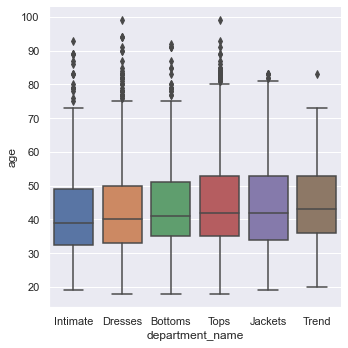

In [31]:
sns.catplot(kind="box", data=df, x="department_name", y="age")

- Below, data is limited to reviews that have 5 or more likes. This is meant to leave the dataframe with reviews that better represent public opinion of the products. This also removes null values in review_text, since people don't upvote empty reviews

In [32]:
df_popular_reviews = df[df.positive_feedback_count >= 5].sort_values(by="positive_feedback_count", ascending=False).reset_index(drop=True)
df_popular_reviews.head(5)

,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
0,1092,34,Beware if you're fuller in the chest,I loved the lace detailing all over this dress...,3,1,122,General,Dresses,Dresses
1,1095,29,NaN,I've been on the hunt for the perfect dress to...,5,1,117,General,Dresses,Dresses
2,986,43,Quality does not merit cost,"I generally don't write bad reviews, but there...",1,0,108,General,Jackets,Jackets
3,1121,35,A navy trench-yes!,I am a big fan of trench coats and i love that...,5,1,99,General,Jackets,Outerwear
4,1078,23,"Super flattering, beautiful dress",This is my favorite dress i've bought in the p...,5,1,98,General,Dresses,Dresses


In [33]:
df_popular_reviews.shape

(3719, 10)

- no more null values for review_text

In [34]:
df_popular_reviews.isnull().sum()

clothing_id                  0
age                          0
title                      472
review_text                  0
rating                       0
recommended_ind              0
positive_feedback_count      0
division_name                1
department_name              1
class_name                   1
dtype: int64

In [35]:
df_popular_reviews.clothing_id.value_counts().head(10)

1078    160
1094    138
862     127
1110    117
1081    107
829      84
872      80
868      75
1086     70
1095     69
Name: clothing_id, dtype: int64

In [36]:
df_popular_reviews.clothing_id.nunique()

440

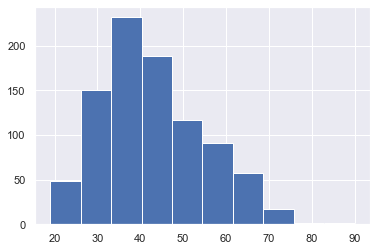

In [37]:
negative_reviews = df_popular_reviews[df_popular_reviews.recommended_ind == 0]
negative_reviews.age.hist()

In [38]:
negative_reviews.age.mean()

43.07836644591612

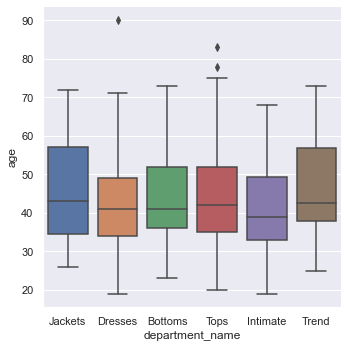

In [39]:
sns.catplot(kind="box", data=negative_reviews, x="department_name", y="age")

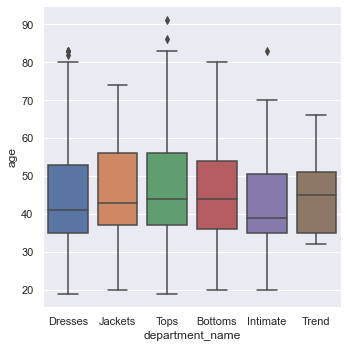

In [40]:
positive_reviews = df_popular_reviews[df_popular_reviews.recommended_ind == 1]
sns.catplot(kind="box", data=positive_reviews, x="department_name", y="age")

In [41]:
negative_reviews.department_name.value_counts() / (df_popular_reviews.department_name.value_counts())

Tops        0.241594
Dresses     0.251295
Bottoms     0.219780
Intimate    0.243902
Jackets     0.261111
Trend       0.434783
Name: department_name, dtype: float64

- Bottoms have the lowest percentage of all bad reviews. "Trend" appears to be a small group of uncategorized reviews.

### Adding features

- The "recommended_ind_%" column is set up below as the average of the recommendations for each product. This, combined with the number of reviews of each product, helps to better visualize the distribution of recommendations.
- "num_reviews" is the total number of reviews for the product

In [42]:
ind_val = []
memo = {} # neat, saves time here

for i in df_popular_reviews.clothing_id:
    if i not in memo.keys():
        x = df_popular_reviews[df_popular_reviews.clothing_id == i].recommended_ind
        ind_val.append(x.sum()/x.count())
        memo[i] = x.sum()/x.count()
    else:
        ind_val.append(memo[i])

In [43]:
df_popular_reviews["recommended_ind_%"] = ind_val
df_popular_reviews["recommended_ind_%"].head()

0    0.717949
1    0.724638
2    0.250000
3    0.888889
4    0.781250
Name: recommended_ind_%, dtype: float64

In [44]:
df_popular_reviews.review_text = [i.replace("\n", " ") for i in df_popular_reviews.review_text]

In [45]:
df_popular_reviews["num_reviews"] = [df_popular_reviews.clothing_id.value_counts()[i] for i in df_popular_reviews.clothing_id]

In [46]:
df_popular_reviews.head()

,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name,recommended_ind_%,num_reviews
0,1092,34,Beware if you're fuller in the chest,I loved the lace detailing all over this dress...,3,1,122,General,Dresses,Dresses,0.717949,39
1,1095,29,NaN,I've been on the hunt for the perfect dress to...,5,1,117,General,Dresses,Dresses,0.724638,69
2,986,43,Quality does not merit cost,"I generally don't write bad reviews, but there...",1,0,108,General,Jackets,Jackets,0.250000,8
3,1121,35,A navy trench-yes!,I am a big fan of trench coats and i love that...,5,1,99,General,Jackets,Outerwear,0.888889,9
4,1078,23,"Super flattering, beautiful dress",This is my favorite dress i've bought in the p...,5,1,98,General,Dresses,Dresses,0.781250,160


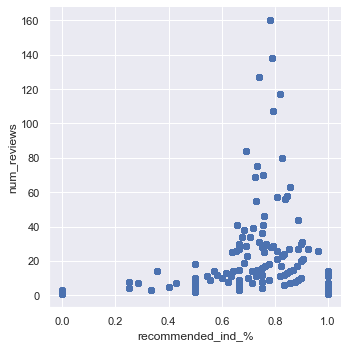

Text(0, 0.5, 'count')

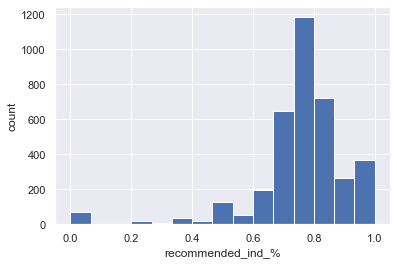

In [47]:
sns.lmplot(data=df_popular_reviews, x='recommended_ind_%', y="num_reviews", fit_reg=False)
plt.show()
df_popular_reviews['recommended_ind_%'].hist(bins=15)
plt.xlabel('recommended_ind_%')
plt.ylabel("count")

- There are far more reviews from people recommending a product than from people not recommending one. The number of reviews is a fair indicator of whether a product will be recommended or not, although the most highly-recommended products do not have many reviews. There seems to be a spike in product reviews at about 80% recommended. 
- The data is left skewed, and the dataset may be too small to get a good understanding of negative reviews

- Removing punctuation and stemming the review texts

In [48]:
reviews = df_popular_reviews.review_text
reviews[0]

"I loved the lace detailing all over this dress and the fact it had pockets and was mostly cotton. it just looked so inviting, so i grabbed two sizes to try on (10 & 12) that 99% of the time fit me with retailer clothes. here are my thoughts: __________ pros: - lace detailing is lovely all over. - everything runs tts except at the bust (see below). - breathable fabric, comfortable. _________ cons: - i'm a 36c and could not button the top two buttons of this dress in a size 10 (i'm 5'9, hourglass, a"

In [49]:
def remove_punct (text):
    for ch in ['\\','`','*','_','{','}','[',']','(',')','>','#','+','-','.','!','$','\'', ':']:
        if ch in text:
            text = text.replace(ch,"")
    return text
remove_punct(reviews[0])

'I loved the lace detailing all over this dress and the fact it had pockets and was mostly cotton it just looked so inviting, so i grabbed two sizes to try on 10 & 12 that 99% of the time fit me with retailer clothes here are my thoughts  pros  lace detailing is lovely all over  everything runs tts except at the bust see below  breathable fabric, comfortable  cons  im a 36c and could not button the top two buttons of this dress in a size 10 im 59, hourglass, a'

In [50]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

reviews_stemmed = []
for review in reviews:
    reviews_stemmed.append(' '.join([stemmer.stem(i) for i in remove_punct(review).split(' ')]))
reviews_stemmed[0]

'i love the lace detail all over this dress and the fact it had pocket and was most cotton it just look so inviting, so i grab two size to tri on 10 & 12 that 99% of the time fit me with retail cloth here are my thought  pros  lace detail is love all over  everyth run tts except at the bust see below  breathabl fabric, comfort  con  im a 36c and could not button the top two button of this dress in a size 10 im 59, hourglass, a'

- Making a function to vectorize, since it needs to be applied to both the reviews of the recommended products and those of the not-recommended ones

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

In [52]:
def make_tfidf_df (str_arr, custom_stop_words = []):
    tfidf = TfidfVectorizer(
        stop_words = ENGLISH_STOP_WORDS.union(custom_stop_words), 
        max_features=150, 
        min_df=.005,
        ngram_range=(1,2)
    )
    review_data = tfidf.fit_transform(str_arr)
    return pd.DataFrame(review_data.todense(), columns=tfidf.get_feature_names())

- Separating negative reviews and positive reviews

In [53]:
recommended = df_popular_reviews[df_popular_reviews.recommended_ind == 1]
not_recommended = df_popular_reviews[df_popular_reviews.recommended_ind == 0]
print(f'yes: {len(recommended)}')
print(f'no: {len(not_recommended)}')

yes: 2813
no: 906


Positive:

In [54]:
rec_reviews = recommended.review_text.reset_index(drop=True)
rec_reviews[0]

"I loved the lace detailing all over this dress and the fact it had pockets and was mostly cotton. it just looked so inviting, so i grabbed two sizes to try on (10 & 12) that 99% of the time fit me with retailer clothes. here are my thoughts: __________ pros: - lace detailing is lovely all over. - everything runs tts except at the bust (see below). - breathable fabric, comfortable. _________ cons: - i'm a 36c and could not button the top two buttons of this dress in a size 10 (i'm 5'9, hourglass, a"

In [55]:
reviews_stemmed = []
for review in rec_reviews:
    reviews_stemmed.append(' '.join([stemmer.stem(i) for i in remove_punct(review).split(' ')]))
reviews_stemmed[0]

'i love the lace detail all over this dress and the fact it had pocket and was most cotton it just look so inviting, so i grab two size to tri on 10 & 12 that 99% of the time fit me with retail cloth here are my thought  pros  lace detail is love all over  everyth run tts except at the bust see below  breathabl fabric, comfort  con  im a 36c and could not button the top two button of this dress in a size 10 im 59, hourglass, a'

In [56]:
pos_reviews_tfidf = make_tfidf_df(reviews_stemmed)
pos_reviews_tfidf.head()

,absolut,actual,ani,area,arm,beauti,becaus,better,big,bit,...,wash,way,wear,weight,went,white,wish,work,worn,xs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.356352,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.232409,0.0,0.279839,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.307816,0.0,0.0,0.0,0.0,0.232488,0.283324,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.257973,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


Negative:

In [57]:
not_rec_reviews = not_recommended.review_text.reset_index(drop=True)
not_rec_reviews[0]

"I generally don't write bad reviews, but there is a real discrepancy between the quality of this kimono and the cost. the design and colors are great, but the fabric is ripping on all the kimonos on the rack in my store where the manufacturer's tag is at the back of the neck. the material is very thin, so there are other small holes beginning throughout the garment. i shop at retailer all the time, and this is not a $98 item of clothing."

In [58]:
reviews_stemmed = []
for review in not_rec_reviews:
    reviews_stemmed.append(' '.join([stemmer.stem(i) for i in remove_punct(review).split(' ')]))
reviews_stemmed[0]

'i general dont write bad reviews, but there is a real discrep between the qualiti of this kimono and the cost the design and color are great, but the fabric is rip on all the kimono on the rack in my store where the manufactur tag is at the back of the neck the materi is veri thin, so there are other small hole begin throughout the garment i shop at retail all the time, and this is not a 98 item of cloth'

In [59]:
neg_reviews_tfidf = make_tfidf_df(reviews_stemmed)
neg_reviews_tfidf.head()

,actual,ani,area,arm,bad,beauti,becaus,better,big,bit,...,want love,wash,wasnt,way,wear,white,wide,work,worth,xs
0,0.0,0.0,0.0,0.000000,0.30592,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.237092,0.00000,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.272247,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.188052,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.116979,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.00000,0.179485,0.15643,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.266696,0.0,0.0,0.0,0.0,0.0


In [60]:
set(pos_reviews_tfidf.columns) - set(neg_reviews_tfidf.columns)

{'absolut',
 'buy',
 'casual',
 'comfort',
 'day',
 'drape',
 'fit perfect',
 'green',
 'hit',
 'jacket',
 'knee',
 'lace',
 'longer',
 'look great',
 'love dress',
 'mani',
 'pocket',
 'print',
 'recommend',
 'regular',
 'slight',
 'stretch',
 'thing',
 'true size',
 'tts',
 'usual size',
 'weight',
 'went',
 'wish',
 'worn'}

In [61]:
set(neg_reviews_tfidf.columns) - set(pos_reviews_tfidf.columns)

{'bad',
 'boxi',
 'cheap',
 'complet',
 'disappoint',
 'excit',
 'expect',
 'felt',
 'fine',
 'hole',
 'hope',
 'howev',
 'huge',
 'isnt',
 'ive',
 'mayb',
 'pull',
 'realli want',
 'receiv',
 'sad',
 'seam',
 'sheer',
 'shorter',
 'someth',
 'thought',
 'unfortun',
 'want love',
 'wasnt',
 'wide',
 'worth'}

- The word lists above have not yet been t-tested

In [62]:
y = df_popular_reviews["recommended_ind"]

In [63]:
rec_reviews = df_popular_reviews.review_text.reset_index(drop=True)
reviews_stemmed = []
for review in rec_reviews:
    reviews_stemmed.append(' '.join([stemmer.stem(i) for i in remove_punct(review).split(' ')]))
reviews_tfidf = make_tfidf_df(reviews_stemmed)
reviews_tfidf.head()

,actual,ani,area,arm,beauti,becaus,better,big,bit,black,...,want,wash,way,wear,weight,went,white,work,worn,xs
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.360887,0.0,0.0,0.0,0.00000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.230432,0.0,0.273895,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.295044,0.0,0.0,0.0,0.21289,0.273636,0.0


In [64]:
X = reviews_tfidf[:]

In [65]:
X.head()

,actual,ani,area,arm,beauti,becaus,better,big,bit,black,...,want,wash,way,wear,weight,went,white,work,worn,xs
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.360887,0.0,0.0,0.0,0.00000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.230432,0.0,0.273895,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.295044,0.0,0.0,0.0,0.21289,0.273636,0.0


In [66]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: recommended_ind, dtype: int64

- applying a random forest classifier to find feature importances

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rfc = RandomForestClassifier(oob_score = True)

In [69]:
rfc.fit(X, y)

RandomForestClassifier(oob_score=True)

In [70]:
rfc.oob_score_

0.7956439903199785

- "oob_score" is the out-of-bag score. Essentially, rows that are left out from each "tree" are used to test the accuracy of each tree. Accuracy is calculated without splitting the data explicitly into train and test sets.

In [71]:
rfc.feature_importances_

array([0.00294227, 0.00278394, 0.00262317, 0.00909917, 0.00905055,
       0.00749709, 0.0035328 , 0.00578292, 0.00560223, 0.00384763,
       0.00291684, 0.00262823, 0.00660116, 0.00446239, 0.00299314,
       0.0047103 , 0.00391884, 0.00245942, 0.00210109, 0.00499629,
       0.01500256, 0.00709926, 0.00718784, 0.00717367, 0.00215497,
       0.00293074, 0.00509173, 0.00665126, 0.00883505, 0.00376586,
       0.03775231, 0.00390619, 0.00380839, 0.00469201, 0.01574864,
       0.0034583 , 0.01807369, 0.00227807, 0.00448888, 0.01161202,
       0.01719361, 0.00436321, 0.00629012, 0.00639036, 0.00306943,
       0.00346566, 0.01337703, 0.0039941 , 0.00475859, 0.00218272,
       0.00534913, 0.01071193, 0.00312485, 0.00223353, 0.004409  ,
       0.01543842, 0.00259266, 0.00680386, 0.00303979, 0.00256029,
       0.0061629 , 0.00288006, 0.01620669, 0.00435876, 0.00730304,
       0.0052338 , 0.00245443, 0.02401923, 0.01190924, 0.00314407,
       0.00291074, 0.01937757, 0.00252207, 0.00599504, 0.02484

In [72]:
X["is_recommended"] = y

<ipython-input-72-6e493a53fa1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["is_recommended"] = y


In [73]:
X.groupby("is_recommended").mean()["disappoint"]

is_recommended
0    0.041326
1    0.005759
Name: disappoint, dtype: float64

- Applying t-tests to separate the significant words and phrases from the insignificant

In [74]:
from scipy import stats

In [75]:
is_recommended = X[X.is_recommended == True]
not_recommended = X[X.is_recommended == False]

In [76]:
ttests = []

for i in X:
    ttests.append(stats.ttest_ind(is_recommended[i], not_recommended[i], equal_var=False))

In [77]:
scored_words = {X.columns[i]: ttests[i].pvalue for i in range(len(X.columns))}

In [78]:
significant_words = dict(filter(lambda x: x[1] <= .05, scored_words.items()))
del significant_words['is_recommended']

In [79]:
len(significant_words)

85

In [80]:
sorted(significant_words.items(), key=lambda x: x[1])

[('perfect', 9.157719277171963e-54),
 ('fit perfect', 6.732996505449588e-31),
 ('soft', 2.694257791760671e-21),
 ('disappoint', 8.1981758911268e-21),
 ('comfort', 7.315221313828174e-18),
 ('great', 2.1214535652459765e-17),
 ('casual', 8.124724823259432e-15),
 ('tts', 2.7456862470684544e-14),
 ('return', 8.622495677549831e-14),
 ('love', 2.0566722386400166e-13),
 ('materi', 2.9815024067062436e-10),
 ('worn', 6.243498798829729e-10),
 ('fit', 1.221883767996899e-09),
 ('look', 1.258623297792819e-09),
 ('thought', 1.6029035999432112e-09),
 ('look like', 3.3304240471233113e-09),
 ('bit', 4.027823856686301e-09),
 ('way', 1.4058819528848517e-08),
 ('bought', 1.628846952648983e-08),
 ('beauti', 1.8060203128704962e-08),
 ('price', 5.353168136752289e-08),
 ('wear', 6.822900772465541e-08),
 ('regular', 1.2687268857930535e-07),
 ('nice', 1.4775781007380864e-07),
 ('petit', 1.7566568064373695e-07),
 ('littl', 2.0054224809516198e-07),
 ('weight', 2.079243907313932e-07),
 ('color', 4.690546213032782e-

- The presence of the words in the significant_words list in a review have a significant chance of indicating that a review is accompanied by a recommendation or non-recommendation. These words can then be used to help train a random forest regressor to determine whether a product will be recommended or not
- (Note: tts stands for "true-to-size") 

In [81]:
sig_words = [i[0] for i in sorted(significant_words.items(), key=lambda x: x[1])]

In [82]:
significant_pos_words = list(set(sig_words) - set(neg_reviews_tfidf.columns))
significant_neg_words = list(set(sig_words) - set(pos_reviews_tfidf.columns))

In [83]:
significant_pos_words

['comfort',
 'knee',
 'jacket',
 'casual',
 'weight',
 'worn',
 'hit',
 'tts',
 'went',
 'slight',
 'day',
 'buy',
 'stretch',
 'usual size',
 'print',
 'fit perfect',
 'true size',
 'thing',
 'recommend',
 'regular']

In [84]:
significant_neg_words

['hope', 'felt', 'disappoint', 'thought', 'receiv', 'expect']

- Above are the sets of significant positive words and significant negative words; if there are more positive words than negative words, it is significantly more likely that a product has been recommended, and vice-versa. 
- Below, these words are added to the dataframe

In [85]:
df_popular_reviews["stemmed_reviews"] = reviews_stemmed

In [86]:
df_popular_reviews["pos_words"] = ''
df_popular_reviews["neg_words"] = ''

In [87]:
sig_positive_words = [np.nan if list(set(significant_pos_words).intersection(set(i))) == [] else list(set(significant_pos_words).intersection(set(i))) for i in [j.split(" ") for j in df_popular_reviews.stemmed_reviews]]
sig_negative_words = [np.nan if list(set(significant_neg_words).intersection(set(i))) == [] else list(set(significant_neg_words).intersection(set(i))) for i in [j.split(" ") for j in df_popular_reviews.stemmed_reviews]]

In [88]:
df_popular_reviews.pos_words = sig_positive_words
df_popular_reviews.neg_words = sig_negative_words

In [89]:
df_popular_reviews.head()


,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name,recommended_ind_%,num_reviews,stemmed_reviews,pos_words,neg_words
0,1092,34,Beware if you're fuller in the chest,I loved the lace detailing all over this dress...,3,1,122,General,Dresses,Dresses,0.717949,39,i love the lace detail all over this dress and...,"[tts, comfort]",[thought]
1,1095,29,NaN,I've been on the hunt for the perfect dress to...,5,1,117,General,Dresses,Dresses,0.724638,69,ive been on the hunt for the perfect dress to ...,NaN,NaN
2,986,43,Quality does not merit cost,"I generally don't write bad reviews, but there...",1,0,108,General,Jackets,Jackets,0.250000,8,"i general dont write bad reviews, but there is...",NaN,NaN
3,1121,35,A navy trench-yes!,I am a big fan of trench coats and i love that...,5,1,99,General,Jackets,Outerwear,0.888889,9,i am a big fan of trench coat and i love that ...,NaN,NaN
4,1078,23,"Super flattering, beautiful dress",This is my favorite dress i've bought in the p...,5,1,98,General,Dresses,Dresses,0.781250,160,this is my favorit dress ive bought in the pas...,"[casual, comfort, regular, worn]",NaN


In [90]:
df_popular_reviews.groupby(['division_name', 'department_name', 'class_name']).pos_words.count()

division_name   department_name  class_name
General         Bottoms          Jeans          56
                                 Pants          88
                                 Shorts         21
                                 Skirts         54
                Dresses          Dresses       356
                Jackets          Jackets        47
                                 Outerwear      17
                Tops             Blouses       154
                                 Fine gauge     42
                                 Knits         239
                                 Sweaters       66
                Trend            Trend           5
General Petite  Bottoms          Jeans          25
                                 Pants          45
                                 Skirts         32
                Dresses          Dresses       237
                Intimate         Lounge         22
                Jackets          Jackets        47
                                 Outer

- Each set of division_name, department_name, and class_name has its own set of associated positive and negative words. These words are sorted out below

In [91]:
def get_pos_neg_words(div, dept, class_):
    div = div.title()
    dept = dept.title()
    class_ = class_.title()
    
    frame = df_popular_reviews[(df_popular_reviews.division_name == div) & (df_popular_reviews.department_name == dept) & (df_popular_reviews.class_name == class_)]
    
    pos_list_of_lists = ['' if type(i) == float else i for i in frame.pos_words]
    all_pos = list(set([i for j in pos_list_of_lists for i in j]))
    neg_list_of_lists = ['' if type(i) == float else i for i in frame.neg_words]
    all_neg = list(set([i for j in neg_list_of_lists for i in j]))
    
    return all_pos, all_neg

In [92]:
div = "initmates"
dept = "intimate"
class_ = "swim"

pos, neg = get_pos_neg_words(div, dept, class_)
print("Category - ", div, dept, class_, "\n\n")
print("positive - ", pos, "\n")
print("Missing positive - ", list(set(significant_pos_words) - set(pos)), '\n\n')
print("negative - ", neg, '\n')
print("Missing negative - ", list(set(significant_neg_words) - set(neg)))

Category -  initmates intimate swim 


positive -  ['slight', 'day', 'buy', 'comfort', 'thing', 'worn', 'stretch', 'recommend', 'regular', 'hit', 'print', 'went'] 

Missing positive -  ['fit perfect', 'casual', 'true size', 'weight', 'usual size', 'tts', 'knee', 'jacket'] 


negative -  ['hope', 'felt', 'thought', 'receiv', 'expect'] 

Missing negative -  ['disappoint']


- Potential improvements can be derived for each category (division_name, department_name, class_name) from the customer reviews. For example, the "initmates intimate swim" category doesn't have either the "tts" ("true-to-size") or "true size" positives. This may indicate that shoppers would feel more positively about those products if they were more similar to the pictures of the products shown, or if there was a better way to get a feel for the size of the product before purchasing. There may also be an opportunity to determine what "casual" swimwear might look like and add a product that fits that description.

# Conclusions:
- negative reviews are fairly balanced across departments, with bottoms having 5% fewer negative reviews than the other departments
- there is language that is significantly more present in positive reviews than in negative reviews, and vice-versa
- this language can be used to determine "recommendations" for what could be improved for each category of division, department, and class

## Potential Next Steps:
- order recommendations based on the number of occurrences, so very frequent positive words are weighted more heavily than a positive word mentioned only once
- find language differences between reviews with high feedback and those with fewer likes and see if it's possible to predict or approximate the positive_feedback_count based on the language used
- cluster to see if there are any meaningful groups of reviews